In [1]:
# Установка модулей 
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
sns.set_style("darkgrid")

In [3]:
# Загружаем данные. df - сокращение от DataFrame
df = pd.read_csv("../data/housing.csv")
# Посмотреть первые 5 строк данных
df.head() 
# df.sample(10) #<-или взять случайно 10 штук

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Посмотреть количество и тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             560 non-null    int64 
 1   area              542 non-null    object
 2   bedrooms          560 non-null    int64 
 3   bathrooms         560 non-null    int64 
 4   stories           560 non-null    int64 
 5   mainroad          560 non-null    object
 6   guestroom         560 non-null    object
 7   basement          560 non-null    object
 8   hotwaterheating   560 non-null    object
 9   airconditioning   560 non-null    object
 10  parking           560 non-null    int64 
 11  prefarea          560 non-null    object
 12  furnishingstatus  560 non-null    object
dtypes: int64(5), object(8)
memory usage: 57.0+ KB


In [5]:
# Описательные статистики
df.describe(include="number") # Для числовых (количественных) признаков
# df.describe(exclude="number") # Для нечисловых признаков

,price,bedrooms,bathrooms,stories,parking
count,5.600000e+02,560.000000,560.000000,560.000000,560.000000
mean,5.221638e+06,2.966071,1.278571,1.810714,0.675000
std,3.307116e+06,0.728116,0.497836,0.856351,0.857306
min,1.750000e+06,1.000000,1.000000,1.000000,0.000000
25%,3.486000e+06,3.000000,1.000000,1.000000,0.000000
50%,4.406500e+06,3.000000,1.000000,2.000000,0.000000
75%,5.944750e+06,3.000000,2.000000,2.000000,1.000000
max,2.175000e+07,6.000000,4.000000,4.000000,3.000000


In [6]:
# Количество экземплярова по ценам
# формат вывода:
# Название поля
# значение поля      количество экземпляров
df["area"].value_counts()
# Обратите внимание на последнюю строку "Not Specified" - пропуск

area
6000             24
3000             14
4500             13
4000             11
6600              9
                 ..
4815              1
9166              1
6321              1
8960              1
Not Specified     1
Name: count, Length: 285, dtype: int64

Price mean: 5221638.285714285
Price median: 4406500.0
Price modes: [3500000 4200000]


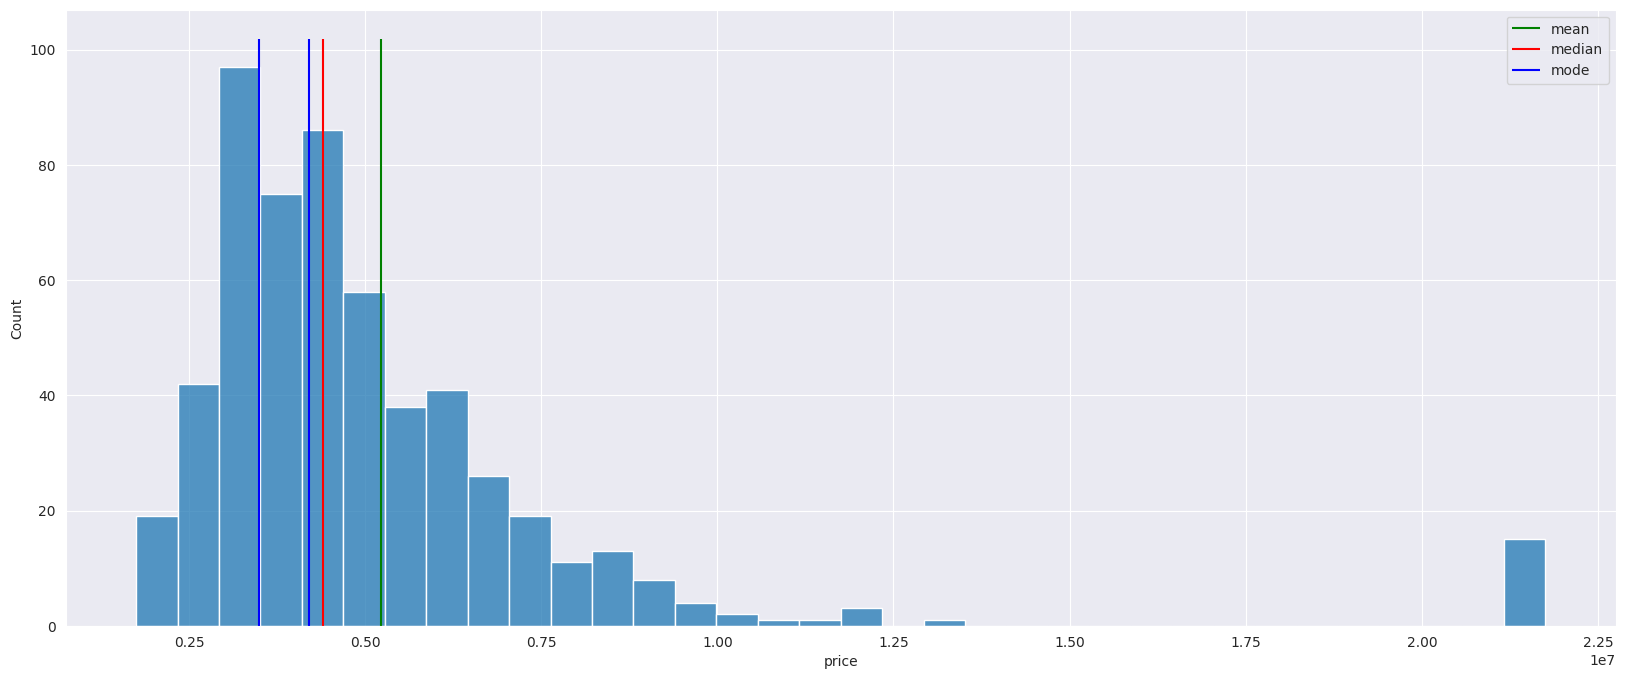

In [7]:
# Создать область для одного рисунка
f, ax = plt.subplots(1, 1, figsize=(20, 8))
# Рисуем график гистограммы
ax = sns.histplot(df, x="price", ax=ax)
# Считаем статистику
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode().values
# Получить верхнюю границу графика
ymax = ax.get_ybound()[1]
# Добавляем вертикальные линии
ax.vlines(
    x=mean_price,
    ymin=0,
    ymax=ymax,
    colors=["green"],
    label="mean"
)
ax.vlines(
    x=median_price,
    ymin=0,
    ymax=ymax,
    colors=["red"],
    label="median",
)
ax.vlines(
    x=mode_price,
    ymin=[0, 0],
    ymax=[ymax, ymax],
    colors="blue",
    label="mode",
)
# Показать легенду
ax.legend()
# Напечатать значения
print("Price mean:", mean_price)
print("Price median:", median_price)
print("Price modes:", mode_price)

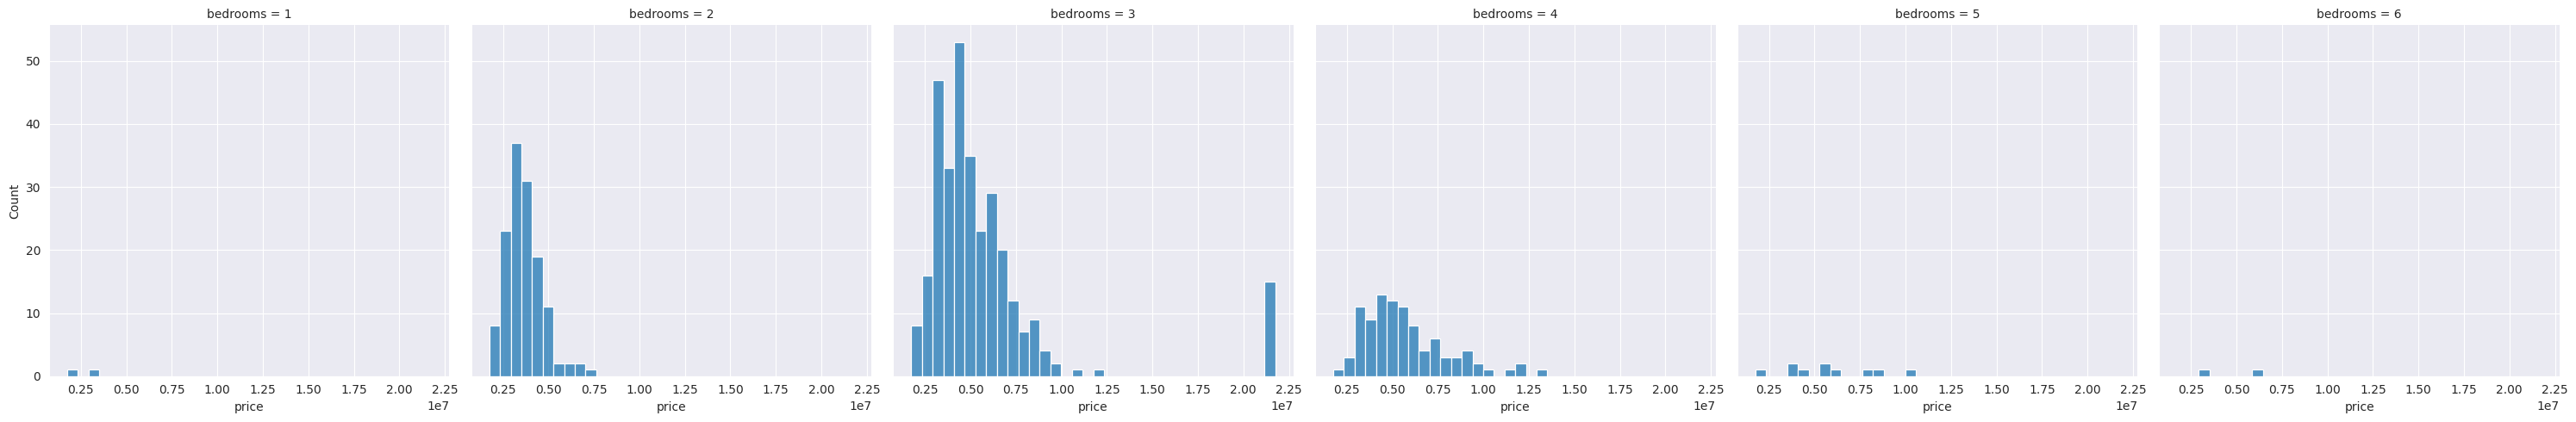

In [8]:
grid = sns.displot(df, x="price", col="bedrooms")

In [9]:
# Подсчет квантилей значений квантилей
(
    df["area"]
    .replace(to_replace="Not Specified", value=np.nan) # Пропуск на пропуск в числовом формате
    .dropna() # Удалить пропуски
    .astype(np.int32) # Преобразовать колонку в числовой формат 
    .quantile(q=np.arange(0, 1.1, 0.25)) # посчитать квантили
)
# Сравните значения с .describe()

0.00     1650.0
0.25     3584.0
0.50     4600.0
0.75     6360.0
1.00    16200.0
Name: area, dtype: float64

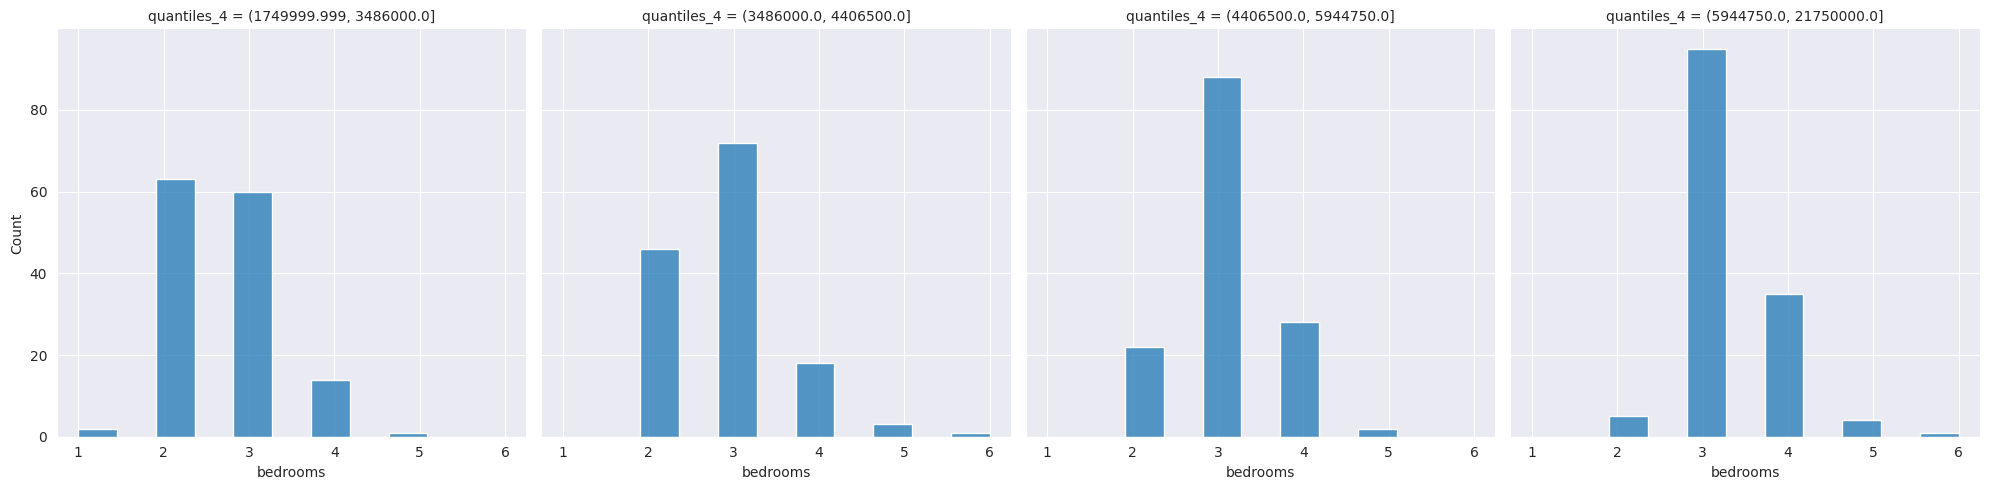

In [10]:
# Создаем новый столбец разбивая выборку на интервалы по квантилям 
df["quantiles_4"] = pd.qcut(df["price"], q=4)
sns.displot(df, x="bedrooms", col="quantiles_4")

Enter на ячейке для редактирования

# Главный заголовок
## Ячейки могут содержать текст в формате markdown
__ЖИРНЫЙ вывод списком__
- Количество комнат влияют на цену. 
- Больше комнат - больше цена. 

1. вместо тире 
2. можно ставить цифры
3. будет нумерованый список